In [6]:
import pandas as pd
import matplotlib.pyplot as plt
plt.style.use('seaborn-poster')

### Αξιολόγηση Πρόγνωσης ΝΟ2

In [7]:
pollutants_list = ['NO2 (ppb)', 'H2S (ppb)', 'O3 (ppb)', 'PM2.5', 'CO']

In [8]:
metrics_dict={}

for pollutant in pollutants_list:

    rf = pd.read_csv(f'{pollutant}_rf_metrics.csv', index_col=0, names=['RF'])[1:]
    reg = pd.read_csv(f'{pollutant}_regression_metrics.csv', index_col=0)
    
    df = pd.concat([rf,reg],axis=1).round(3)
    df.loc['MSE']  = df.loc['MSE']/10
    df.loc['MAPE'] = df.loc['MAPE']*10
    df.loc['R2']   = df.loc['R2']*10
    
    metrics_dict[pollutant] = df

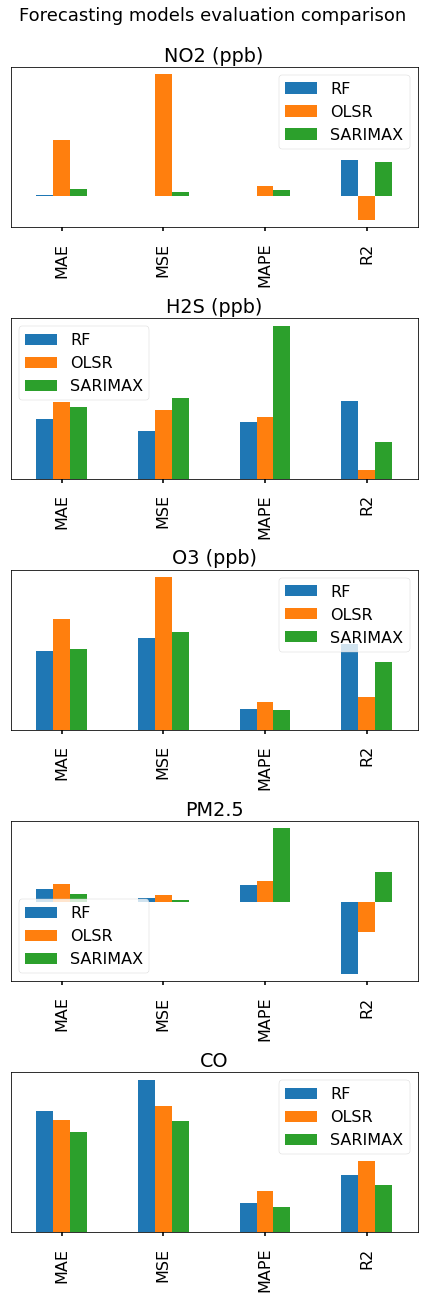

In [11]:
fig, ax = plt.subplots(len(metrics_dict), figsize=(6,18))

for i,m in enumerate(metrics_dict):
    
    if m=='PM2.5':
        metrics_dict[m].plot(kind='bar', ax=ax[i])
        ax[i].set_yticks([])
        ax[i].set_title(f"{m}")
        ax[i].legend(loc='lower left')
    
    else:
    
        metrics_dict[m].plot(kind='bar', ax=ax[i])
        ax[i].set_yticks([])
        ax[i].set_title(f"{m}")
    
plt.suptitle('Forecasting models evaluation comparison', y=1, fontsize=18)
plt.tight_layout()
plt.savefig("Plots/forecast_evaluation/comparison.png")
plt.show()